# Classifier metrics with paper parameters

In [ ]:
from parameters import Parameters, CardSimParameters, ClassificationParameters
from banksys import Banksys
import polars as pl

params = Parameters(cardsim=CardSimParameters.paper_params(), clf_params=ClassificationParameters.paper_params())

#banksys = params.create_env().system
banksys = Banksys.load("/home/yann/projects/python/RL_Attack_September24/cache/banksys/20000-payers/910-days/start-2023-01-01")
print(banksys.current_time)
#banksys = params.create_banksys()

2023-06-30 00:01:23


In [ ]:
from datetime import timedelta

end_time = banksys.current_time + timedelta(days=30)
transactions = banksys._transactions_df.filter(pl.col("timestamp").is_between(banksys.current_time, end_time))
test_y = transactions["is_fraud"]
dfs = banksys.simulate_until(end_time)
test_x = pl.concat(dfs)
test_x.describe()

statistic,hour,is_online,amount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,card_n_trx_last_1:00:00,card_mean_amount_last_1:00:00,"card_n_trx_last_1 day, 0:00:00","card_mean_amount_last_1 day, 0:00:00","card_n_trx_last_7 days, 0:00:00","card_mean_amount_last_7 days, 0:00:00","card_n_trx_last_30 days, 0:00:00","card_mean_amount_last_30 days, 0:00:00",terminal_n_trx_last_1:00:00,terminal_risk_last_1:00:00,"terminal_n_trx_last_1 day, 0:00:00","terminal_risk_last_1 day, 0:00:00","terminal_n_trx_last_7 days, 0:00:00","terminal_risk_last_7 days, 0:00:00","terminal_n_trx_last_30 days, 0:00:00","terminal_risk_last_30 days, 0:00:00"
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0,522397.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",12.205954,0.359242,21.14523,0.132598,0.133318,0.134076,0.133628,0.167223,0.166381,0.132774,0.069652,1.402532,0.909272,12.445727,6.358832,21.073487,27.236058,21.107497,0.696363,0.005148,9.112416,0.020537,63.777575,0.02036,273.255614,0.020122
"""std""",4.884993,0.479779,29.445445,0.33914,0.339919,0.340734,0.340253,0.373176,0.372423,0.339331,0.267231,9.032053,0.973813,22.663645,2.883112,15.975172,7.852599,11.188978,0.927506,0.06605,3.517749,0.054941,14.843424,0.020327,56.069853,0.01012
"""min""",0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.361818,0.0,0.0,0.0,0.0,14.0,0.0,106.0,0.0
"""25%""",8.0,0.0,6.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.103,22.0,13.1744,0.0,0.0,7.0,0.0,53.0,0.0,229.0,0.012821
"""50%""",11.0,0.0,12.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.18,6.0,16.864286,27.0,18.220476,0.0,0.0,9.0,0.0,64.0,0.016129,278.0,0.018797
"""75%""",18.0,1.0,24.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.18,8.0,26.07,32.0,26.066279,1.0,0.0,11.0,0.0,75.0,0.030769,319.0,0.026087
"""max""",23.0,1.0,2502.69,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,826.38,8.0,1133.6,28.0,778.22,83.0,201.07,10.0,1.0,29.0,1.0,117.0,0.192308,424.0,0.0859375


F1 Score: 0.36171566755759194
Recall: 0.5542121684867395
Precision: 0.2684677876440582
Accuracy: 0.9808000428792661
Confusion Matrix:
[[509525   7744]
 [  2286   2842]]


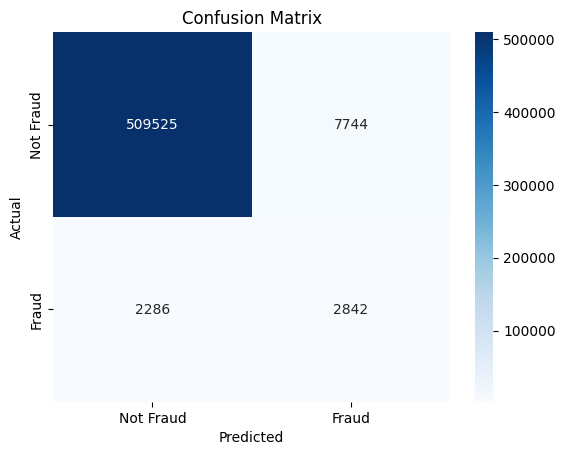

In [9]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predicted = banksys.clf.predict(test_x)

f1 = f1_score(test_y, predicted)
recall = recall_score(test_y, predicted)
precision = precision_score(test_y, predicted)
accuracy = accuracy_score(test_y, predicted)
confusion = confusion_matrix(test_y, predicted)
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import numpy as np
from datetime import timedelta

test_duration = timedelta(days=30)

dfs = banksys.simulate_until(banksys.attack_start + test_duration)
test_x = pl.concat(dfs)
test_y = banksys.training_set["is_fraud"].to_numpy().astype(np.bool)


In [ ]:
test_x.describe()
len(test_y)

2609409

In [ ]:
test_x2 = test_x[-2609409:]
test_x2.describe()


statistic,hour,is_online,amount,Mon,Tue,Wed,Thu,Fri,Sat,Sun,card_n_trx_last_1:00:00,card_mean_amount_last_1:00:00,"card_n_trx_last_1 day, 0:00:00","card_mean_amount_last_1 day, 0:00:00","card_n_trx_last_7 days, 0:00:00","card_mean_amount_last_7 days, 0:00:00","card_n_trx_last_30 days, 0:00:00","card_mean_amount_last_30 days, 0:00:00",terminal_n_trx_last_1:00:00,terminal_risk_last_1:00:00,"terminal_n_trx_last_1 day, 0:00:00","terminal_risk_last_1 day, 0:00:00","terminal_n_trx_last_7 days, 0:00:00","terminal_risk_last_7 days, 0:00:00","terminal_n_trx_last_30 days, 0:00:00","terminal_risk_last_30 days, 0:00:00"
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6,2.609409e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",12.204034,0.359337,21.120184,0.139588,0.140333,0.139959,0.146494,0.146591,0.146991,0.140046,0.069361,1.39738,0.906797,12.433196,6.347755,21.05788,27.19605,21.111099,0.694985,0.005472,9.098756,0.021456,63.692736,0.021431,272.890595,0.021501
"""std""",4.881288,0.479806,29.051162,0.346559,0.347332,0.346944,0.353601,0.353697,0.354097,0.347035,0.266453,9.108352,0.971643,22.533197,2.867834,15.841194,7.815611,11.194458,0.926247,0.06813,3.510873,0.056035,14.831898,0.021293,56.047912,0.012732
"""min""",0.0,0.0,0.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.17,0.0,0.0,0.0,0.0,13.0,0.0,97.0,0.0
"""25%""",8.0,0.0,6.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,11.117778,22.0,13.185417,0.0,0.0,7.0,0.0,53.0,0.0,229.0,0.011811
"""50%""",12.0,0.0,12.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.17,6.0,16.915556,26.0,18.261071,0.0,0.0,9.0,0.0,64.0,0.016393,277.0,0.019685
"""75%""",18.0,1.0,24.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.2,8.0,26.13,32.0,26.017619,1.0,0.0,11.0,0.0,75.0,0.032258,319.0,0.029412
"""max""",23.0,1.0,2502.69,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1724.94,9.0,1724.94,31.0,946.09,85.0,201.07,10.0,1.0,31.0,1.0,120.0,0.230769,424.0,0.119048


F1 Score: 0.03384841795437822
Recall: 0.053081006231248555
Precision: 0.024846062439235175
Accuracy: 0.9698092556590401
Confusion Matrix:
[[2529249   54162]
 [  24618    1380]]


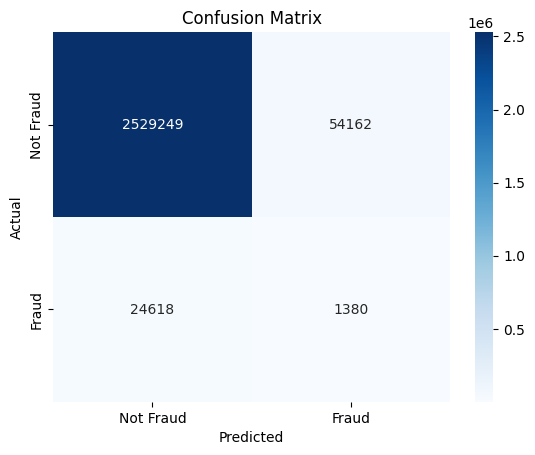

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

predicted = banksys.clf.predict(test_x2)

f1 = f1_score(test_y, predicted)
recall = recall_score(test_y, predicted)
precision = precision_score(test_y, predicted)
accuracy = accuracy_score(test_y, predicted)
confusion = confusion_matrix(test_y, predicted)
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()